# **FRA503 : Report HW1 (Exploration and Exploitation)**

## **Set up bandit (rewards and probability of rewards)**

In [1]:
from bandit import MultiArmBandit
from agent import EpsilonGreedy, UCB
import matplotlib.pyplot as plt
import numpy as np

Set up number of bandit, Rewards of each bandit and Probability of each rewards in class MultiArmBandit 

**Function**
bandit.MultiArmBandit(Object , num_bandits:int, rewards:list=None, prob_reward:list=None)

***Variable***
- **num_bandits** : Number of arm bandit 
- **rewards** : Possible rewards of each bandit 
- **prob_reward** : Probability of each rewards 

***Method***
- **pull_arm()** --> Return random reward when user pulling arm bandit in 1 time
- **prob_action()** --> Return true reward of each action (reward * probability)



In [2]:
bandit = MultiArmBandit(5,[[4, 8, -2, 1], [-4, -5, 6], [1, -4, 0], [-7, 4], [-8, 2]], [[0.47, 0.32, 0.0, 0.21], [0.0, 0.47, 0.53], [0.54, 0.0, 0.46], [0.57, 0.43], [0.67, 0.33]])
print("Number of bandit :",bandit.num_bandits)
print("Rewards :",bandit.reward)
print("Probability of rewards :",bandit.prob_reward)
print("Reward when pulling arm :",bandit.pull_arm())
print("True Reward :",bandit.prob_action())

Number of bandit : 5
Rewards : [[4, 8, -2, 1], [-4, -5, 6], [1, -4, 0], [-7, 4], [-8, 2]]
Probability of rewards : [[0.47, 0.32, 0.0, 0.21], [0.0, 0.47, 0.53], [0.54, 0.0, 0.46], [0.57, 0.43], [0.67, 0.33]]
Reward when pulling arm : [1, 6, 0, 4, -8]
True Reward : [4.65, 0.83, 0.54, -2.27, -4.7]


## **Epsilon Greedy**

Set up the agent by using Epsilon Greedy Algorithm and Epsilon must range in 0 to 1 and

**Function**
agent.EpsilonGreedy(Object , epsilon:float=0.1, bandit:object=None)

***Variable***
- **epsilon** : Epsilon (0 to 1).
- **bandit** : The bandit that was set up before.  
- **action_values** : Action value (sum of reward / numbers of action)
- **his_action_values** : All action value use for plot
- **action_counts** : Number of action
- **reward_history** : All reward 
- **total_reward** : Total reward in final step
- **his_total_reward** : All total reward in all step

***Method***
- **select_action()** --> Return action that select when pulling arm bandit
- **update(action, reward)** --> Method for update variable 
- **run(step:int=100)** --> Method for run select action and update variable in x step


### **Epsilon = 0.1** 

Set epsilon is 0.1 if ramdom number > 0.1 to exploitation and random number < 0.1 to exploration

In [7]:
Epsilon01 = EpsilonGreedy(0.1,bandit)
Epsilon01.run(10000)
print("epsilon :",Epsilon01.epsilon)
print("bandit :",Epsilon01.bandit)
print("action_values :",Epsilon01.action_values)
print("his_action_values :",Epsilon01.his_action_values)
print("action_counts :",Epsilon01.action_counts)
print("reward_history :",Epsilon01.reward_history)
print("total_reward :",Epsilon01.total_reward)
print("his_total_reward :",Epsilon01.his_total_reward)

epsilon : 0.1
bandit : <bandit.MultiArmBandit object at 0x0000022F3F59BA90>
action_values : [ 4.62427934  0.96315789  0.46363636 -2.49740933 -5.05882353]
his_action_values : [[8.0, 8.0, 8.0, 6.666666666666667, 6.666666666666667, 6.0, 5.6, 6.0, 5.285714285714286, 4.75, 4.333333333333333, 4.699999999999999, 4.999999999999999, 4.666666666666666, 4.615384615384615, 4.571428571428571, 4.571428571428571, 4.8, 4.5625, 4.764705882352941, 4.944444444444445, 4.894736842105264, 4.7, 4.666666666666667, 4.636363636363637, 4.478260869565218, 4.478260869565218, 4.333333333333334, 4.32, 4.307692307692308, 4.296296296296297, 4.2857142857142865, 4.2857142857142865, 4.275862068965518, 4.166666666666667, 4.290322580645162, 4.406250000000001, 4.406250000000001, 4.406250000000001, 4.3939393939393945, 4.382352941176471, 4.382352941176471, 4.371428571428572, 4.361111111111112, 4.351351351351352, 4.342105263157896, 4.333333333333334, 4.325, 4.2439024390243905, 4.238095238095238, 4.325581395348837, 4.4090909090

From the action_values compare with true reward graph, you can see blue and green graphs trending towards the true reward, while purple, red, and orange graphs do not. Furthermore, it can also be observed that the graphs of purple, red, and orange lines exhibit a step-like pattern with infrequent changes in values.

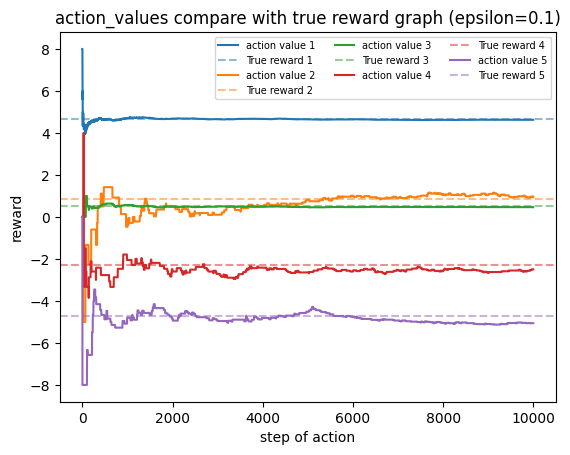

In [164]:
for i in range(bandit.num_bandits):
    line = plt.plot(Epsilon01.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (epsilon=0.1)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='upper right', fontsize=7, ncol=3)

From the total_reward graph, it's evident that there's a continuous upward trend characterized by straight lines, with no changes in the trend.

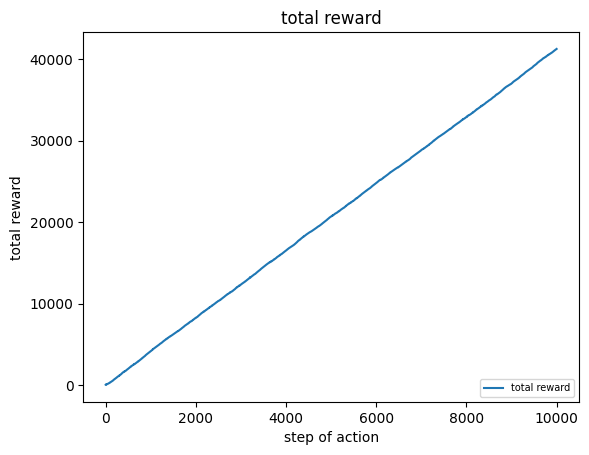

In [201]:
plt.plot(Epsilon01.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()


In conclusion, the non-trending toward the true reward graphs is evident from the clear steps in the purple, red, and orange graphs. In the total reward graph, a continuous upward trend is characterized. It can be concluded that this result is attributed to an epsilon value of 0.1, resulting in continuous exploitation and minimal exploration, leading to very few random actions.

### **Epsilon = 0.5** 

Set epsilon is 0.5 if ramdom number > 0.5 to exploitation and random number < 0.5 to exploration

In [44]:
Epsilon05 = EpsilonGreedy(0.5,bandit)
Epsilon05.run(10000)
print("epsilon :",Epsilon05.epsilon)
print("bandit :",Epsilon05.bandit)
print("action_values :",Epsilon05.action_values)
print("his_action_values :",Epsilon05.his_action_values)
print("action_counts :",Epsilon05.action_counts)
print("reward_history :",Epsilon05.reward_history)
print("total_reward :",Epsilon05.total_reward)
print("his_total_reward :",Epsilon05.his_total_reward)

epsilon : 0.5
bandit : <bandit.MultiArmBandit object at 0x0000022F3F59BA90>
action_values : [ 4.66415663  0.86162905  0.49951028 -2.19814241 -4.73891626]
his_action_values : [[1.0, 2.5, 2.5, 4.333333333333333, 4.25, 4.2, 4.2, 4.166666666666667, 3.7142857142857144, 3.7142857142857144, 3.7142857142857144, 3.7142857142857144, 3.7142857142857144, 3.7142857142857144, 3.75, 3.75, 3.4444444444444446, 3.5, 3.5, 3.909090909090909, 3.666666666666667, 3.6923076923076925, 3.6923076923076925, 3.7142857142857144, 4.0, 4.0, 4.0, 4.235294117647059, 4.444444444444445, 4.444444444444445, 4.421052631578948, 4.6000000000000005, 4.571428571428572, 4.545454545454546, 4.545454545454546, 4.521739130434783, 4.666666666666667, 4.640000000000001, 4.640000000000001, 4.615384615384616, 4.615384615384616, 4.615384615384616, 4.615384615384616, 4.740740740740741, 4.740740740740741, 4.857142857142858, 4.8275862068965525, 4.8275862068965525, 4.8275862068965525, 4.9333333333333345, 4.903225806451614, 4.903225806451614, 

From the action_values compared with the true reward graph, it's observable that the action values of all 5 arm bandits tend towards the true reward around Step 7000.

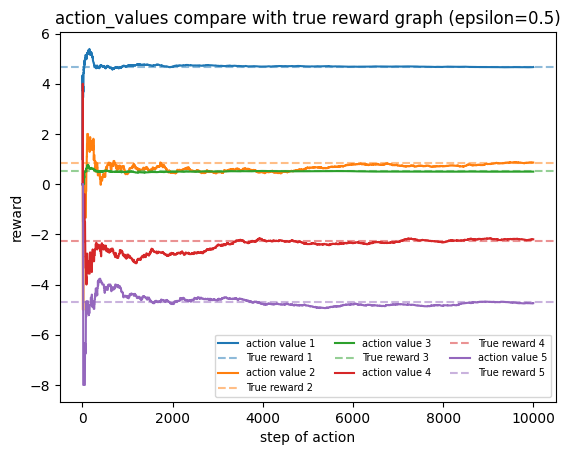

In [167]:
for i in range(bandit.num_bandits):
    line = plt.plot(Epsilon05.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (epsilon=0.5)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)

From the total_reward graph, it's evident that there's a continuous upward trend characterized by straight lines, but have some noise in this graph.

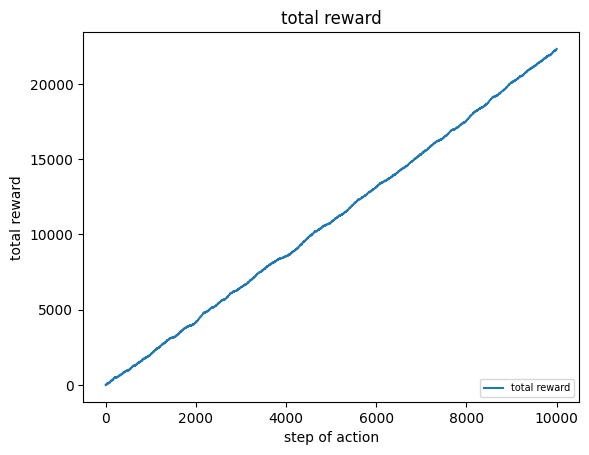

In [202]:
plt.plot(Epsilon05.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()

In conclusion, increasing the epsilon value results in a faster convergence toward the true reward because it allows for equal exploration and exploitation percentages.

### **Epsilon = 0.9** 

Set epsilon is 0.9 if ramdom number > 0.9 to exploitation and random number < 0.9 to exploration

In [69]:
Epsilon09 = EpsilonGreedy(0.9,bandit)
Epsilon09.run(10000)
print("epsilon :",Epsilon09.epsilon)
print("bandit :",Epsilon09.bandit)
print("action_values :",Epsilon09.action_values)
print("his_action_values :",Epsilon09.his_action_values)
print("action_counts :",Epsilon09.action_counts)
print("reward_history :",Epsilon09.reward_history)
print("total_reward :",Epsilon09.total_reward)
print("his_total_reward :",Epsilon09.his_total_reward)

epsilon : 0.9
bandit : <bandit.MultiArmBandit object at 0x0000022F3F59BA90>
action_values : [ 4.62191582  0.69674319  0.53314917 -2.18589744 -4.59620596]
his_action_values : [[8.0, 6.0, 6.0, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 5.333333333333333, 6.0, 5.6, 5.6, 5.333333333333333, 5.333333333333333, 5.142857142857142, 5.0, 4.888888888888889, 4.888888888888889, 4.888888888888889, 4.800000000000001, 4.800000000000001, 4.7272727272727275, 4.7272727272727275, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.923076923076923, 5.142857142857143, 5.142857142857143, 5.142857142857143, 5.066666666666667, 4.812500000000001, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705882352942, 4.764705

From the action_values compared with the true reward graph, it's observable that the action values of all 5 arm bandits tend towards the true reward around step 4000.

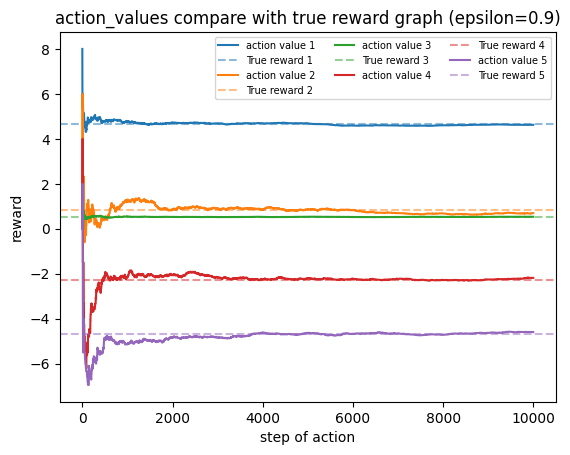

In [168]:
for i in range(bandit.num_bandits):
    line = plt.plot(Epsilon09.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (epsilon=0.9)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='upper right', fontsize=7, ncol=3)

From the total_reward graph, can observe a continuous upward trend, but it's not linear. Additionally, there's a pattern of fluctuations, alternating between increases and decreases continuously.

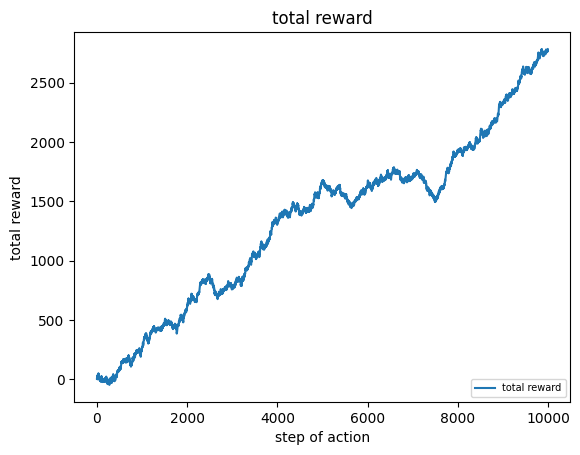

In [203]:
plt.plot(Epsilon09.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()

In conclusion, that increasing the value of epsilon results in a faster convergence towards the true reward because it increases exploration, leading to more frequent changes in actions. On the other hand, causes the total_reward graph to have a considerable amount of noise (characterized by frequent fluctuations).

## **UCB (Upper confidence bound)**

Set up the agent by using Epsilon Greedy Algorithm and Epsilon must range in 0 to 1 and

**Function**
agent.UCB(Object , c=2, bandit:object=None)

***Variable***
- **c** : upper confidence term
- **bandit** : The bandit that was set up before.  
- **action_values** : Action value (sum of reward / numbers of action)
- **his_action_values** : All action value use for plot
- **action_counts** : Number of action
- **reward_history** : All reward 
- **total_reward** : Total reward in final step
- **his_total_reward** : All total reward in all step

***Method***
- **select_action()** --> Return action that select when pulling arm bandit
- **update(action, reward)** --> Method for update variable 
- **run(step:int=100)** --> Method for run select action and update variable in x step

### **Upper confidence term = 10** 

In [72]:
UCB10 = UCB(10,bandit)
UCB10.run(10000)
print("epsilon :",UCB10.c)
print("bandit :",UCB10.bandit)
print("action_values :",UCB10.action_values)
print("his_action_values :",UCB10.his_action_values)
print("action_counts :",UCB10.action_counts)
print("reward_history :",UCB10.reward_history)
print("total_reward :",UCB10.total_reward)
print("his_total_reward :",UCB10.his_total_reward)

epsilon : 10
bandit : <bandit.MultiArmBandit object at 0x0000022F3F59BA90>
action_values : [ 4.62326477  0.37777778  0.54166667 -1.07692308 -3.83333333]
his_action_values : [[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.25, 6.25, 6.6, 6.166666666666666, 5.857142857142857, 5.857142857142857, 5.625, 5.625, 5.444444444444445, 5.3, 5.3, 5.181818181818182, 5.181818181818182, 5.416666666666666, 5.3076923076923075, 5.214285714285714, 5.133333333333334, 5.133333333333334, 5.133333333333334, 5.0625, 5.235294117647059, 5.0, 4.7894736842105265, 4.7894736842105265, 4.95, 5.095238095238096, 5.045454545454546, 5.173913043478262, 5.125000000000001, 5.080000000000001, 4.923076923076924, 4.88888888888889, 4.88888888888889, 4.88888888888889, 4.750000000000001, 4.750000000000001, 4.724137931034484, 4.700000000000001, 4.580645161290324, 4.580645161290324, 4.468750000000001, 4.468750000000001, 4.363636363636364, 4.352941176470589, 4.342857142857143, 4.342857142857143, 4.333333333333334, 4.333333333333334, 4.3

From the action_values compare with true reward graph, you can see blue and green graphs trending towards the true reward, while purple, red, and orange graphs do not. Furthermore, it can also be observed that the graphs of purple, red, and orange lines exhibit a step-like pattern with infrequent changes in values.

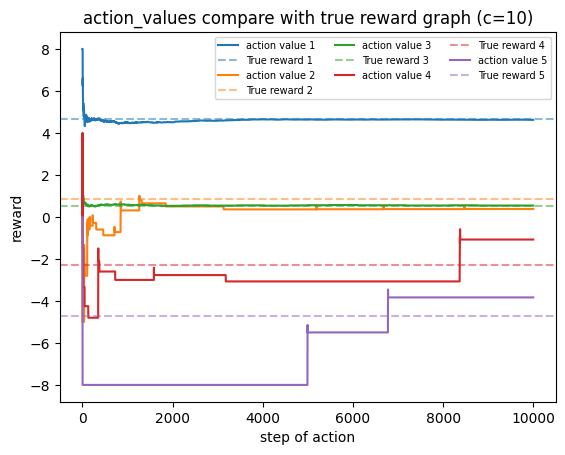

In [169]:
for i in range(bandit.num_bandits):
    line = plt.plot(UCB10.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (c=10)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='upper right', fontsize=7, ncol=3)

From the total_reward graph, it's evident that there's a continuous upward trend characterized by linear lines.

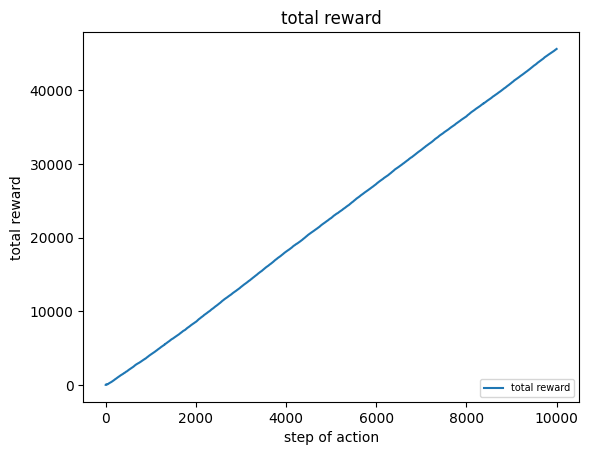

In [204]:
plt.plot(UCB10.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()

In summary, from the graph comparing action values and true rewards, it is evident that setting a low value for C results in less exploration and more exploitation, leading to only the blue and green graphs converging toward the true reward. Meanwhile, the purple, red, and orange graphs exhibit infrequent changes in action values due to minimal exploration caused by the low value of C.

### **Upper confidence term = 50** 

In [178]:
UCB50 = UCB(50,bandit)
UCB50.run(10000)
print("epsilon :",UCB50.c)
print("bandit :",UCB50.bandit)
print("action_values :",UCB50.action_values)
print("his_action_values :",UCB50.his_action_values)
print("action_counts :",UCB50.action_counts)
print("reward_history :",UCB50.reward_history)
print("total_reward :",UCB50.total_reward)
print("his_total_reward :",UCB50.his_total_reward)

epsilon : 50
bandit : <bandit.MultiArmBandit object at 0x0000022F3F59BA90>
action_values : [ 4.64122979  0.48377581  0.56752874 -2.8057554  -4.90217391]
his_action_values : [[1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.25, 3.25, 3.25, 3.25, 3.4, 3.4, 3.4, 3.4, 3.4, 3.0, 3.0, 3.0, 3.0, 2.7142857142857144, 2.7142857142857144, 2.7142857142857144, 2.7142857142857144, 2.7142857142857144, 3.375, 3.4444444444444446, 3.4444444444444446, 3.4444444444444446, 3.4444444444444446, 3.4444444444444446, 3.9000000000000004, 3.9000000000000004, 3.9000000000000004, 3.9000000000000004, 4.272727272727273, 4.272727272727273, 4.250000000000001, 4.250000000000001, 4.250000000000001, 4.250000000000001, 4.250000000000001, 4.230769230769232, 4.230769230769232, 4.230769230769232, 4.214285714285715, 4.214285714285715, 4.214285714285715, 4.466666666666668, 4.466666666666668, 4.466666666666668, 4.437500000000001, 4.437500000000001, 4.437500000000001, 4.411764705882354, 4.411764705882

From the comparison between action values and the true reward graph, it can be observed that there are changes in the action values in every graph. However, in the purple, red, and orange graphs, there is a significant tendency towards approaching the true reward value. Nonetheless, even at the end of the 10,000 actions, the action values still do not match the true reward value.

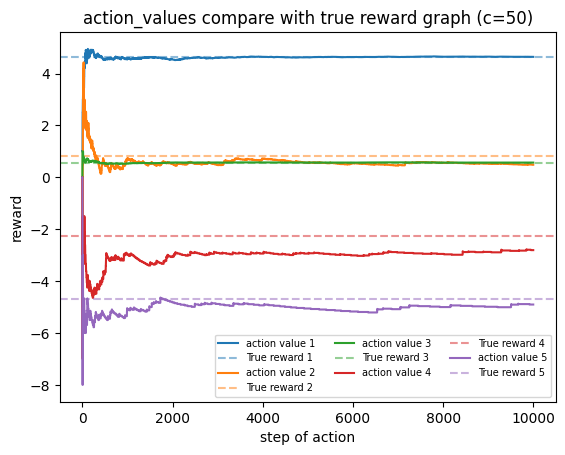

In [180]:
for i in range(bandit.num_bandits):
    line = plt.plot(UCB50.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (c=50)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)

From the total_reward graph, it's evident that there's a continuous upward trend characterized by linear lines.

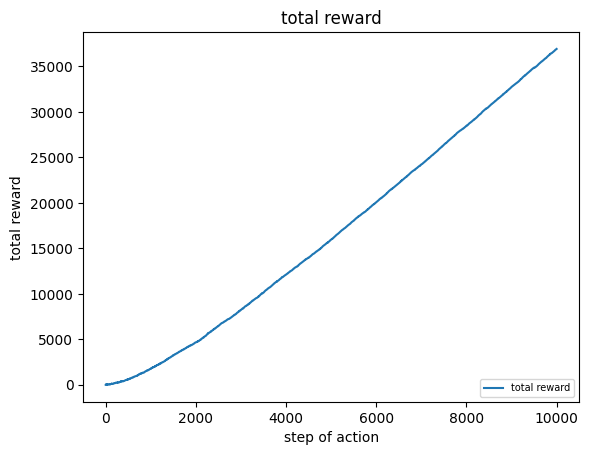

In [205]:
plt.plot(UCB50.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()

In summary, increasing the value of C leads to increased exploration, resulting in more random actions and causing the action values of all arm bandits to converge towards the true reward. However, this may result in a slow convergence towards the true reward.

### **Upper confidence term = 150** 

In [111]:
UCB150 = UCB(150,bandit)
UCB150.run(10000)
print("epsilon :",UCB150.c)
print("bandit :",UCB150.bandit)
print("action_values :",UCB150.action_values)
print("his_action_values :",UCB150.his_action_values)
print("action_counts :",UCB150.action_counts)
print("reward_history :",UCB150.reward_history)
print("total_reward :",UCB150.total_reward)
print("his_total_reward :",UCB150.his_total_reward)

epsilon : 150
bandit : <bandit.MultiArmBandit object at 0x0000022F3F59BA90>
action_values : [ 4.70562293  0.83024017  0.54372842 -2.27       -4.67924528]
his_action_values : [[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 4.333333333333333, 4.333333333333333, 4.333333333333333, 4.333333333333333, 4.333333333333333, 4.333333333333333, 3.5, 3.5, 3.5, 3.5, 4.4, 4.4, 4.4, 4.4, 4.4, 5.0, 5.0, 5.0, 5.0, 4.857142857142857, 4.857142857142857, 4.857142857142857, 4.857142857142857, 4.857142857142857, 4.75, 4.75, 4.75, 4.75, 4.75, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.666666666666667, 4.6000000000000005, 4.6000000000000005, 4.6000000000000005, 4.6000000000000005, 4.909090909090909, 4.909090909090909, 4.909090909090909, 4.909090909090909, 4.909090909090909, 4.833333333333333, 4.833333333333333, 4.833333333333333, 4.833333333333333, 5.076923076923077, 5.076923076923077, 5.076923076923077, 5.076923076923077, 5.0, 5.0, 5.0, 5.0, 4.933333333333334, 4.9333333

From the action_values compared with the true reward graph, it's observable that the action values of all 5 arm bandits tend towards the true reward around step 5000.

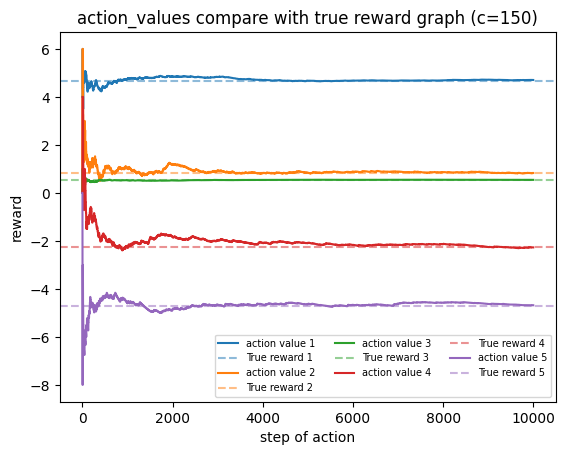

In [182]:
for i in range(bandit.num_bandits):
    line = plt.plot(UCB150.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (c=150)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)

From the total_reward graph, it's evident that there's a continuous upward trend characterized by straight lines, but have some noise in this graph.

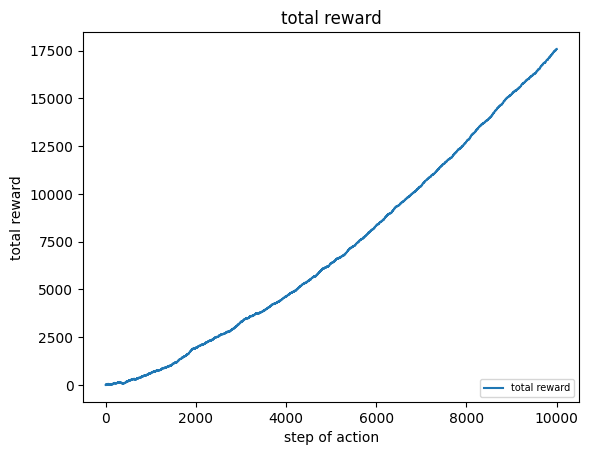

In [206]:
plt.plot(UCB150.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()

In summary, increasing the value of C leads to increased exploration, resulting in more random actions and causing the action values of all arm bandits to converge towards the true reward. Furthermore, as C is increased further, exploration increases even more, leading to a faster convergence of action values towards the true reward.

### **Upper confidence term = 500** 

In [5]:
UCB500 = UCB(500,bandit)
UCB500.run(10000)
print("epsilon :",UCB500.c)
print("bandit :",UCB500.bandit)
print("action_values :",UCB500.action_values)
print("his_action_values :",UCB500.his_action_values)
print("action_counts :",UCB500.action_counts)
print("reward_history :",UCB500.reward_history)
print("total_reward :",UCB500.total_reward)
print("his_total_reward :",UCB500.his_total_reward)

epsilon : 500
bandit : <bandit.MultiArmBandit object at 0x000001AF7F313510>
action_values : [ 4.62533283  1.00095877  0.54751354 -2.24667822 -4.67104399]
his_action_values : [[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.6, 6.6, 6.6, 6.6, 6.6, 5.666666666666666, 5.666666666666666, 5.666666666666666, 5.666666666666666, 5.666666666666666, 5.999999999999999, 5.999999999999999, 5.999999999999999, 5.999999999999999, 5.999999999999999, 6.249999999999999, 6.249999999999999, 6.249999999999999, 6.249999999999999, 6.249999999999999, 5.999999999999999, 5.999999999999999, 5.999999999999999, 5.999999999999999, 5.999999999999999, 5.799999999999999, 5.799999999999999, 5.799999999999999, 5.799999999999999, 5.799999999999999, 5.363636363636362, 5.363636363636362, 5.363636363636362, 5.363636363636362, 5.363636363636362, 5.583333333333332, 5.583333333333332, 5.583333333333332, 5.583333333333332, 5.583333333333332, 5.461538461538461, 5.4615384615384

From the action_values compared with the true reward graph, it's observable that the action values of all 5 arm bandits tend towards the true reward around step 8000.

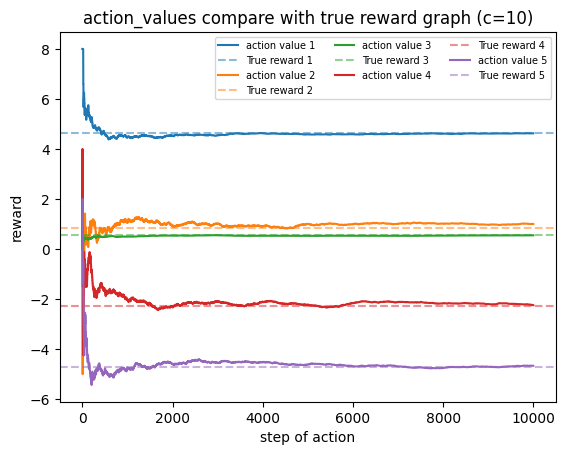

In [7]:
for i in range(bandit.num_bandits):
    line = plt.plot(UCB500.his_action_values[i], label="action value "+str(i+1))[0]
    plt.axhline(bandit.prob_action()[i], linestyle='--', color=line.get_color(), label="True reward "+str(i+1), linewidth=1.5, alpha=0.5)

plt.title("action_values compare with true reward graph (c=10)")
plt.xlabel("step of action")
plt.ylabel("reward")
leg = plt.legend(loc='upper right', fontsize=7, ncol=3)

From the total_reward graph, can observe a continuous upward trend, but it's not linear. Additionally, there's a pattern of fluctuations, alternating between increases and decreases continuously.

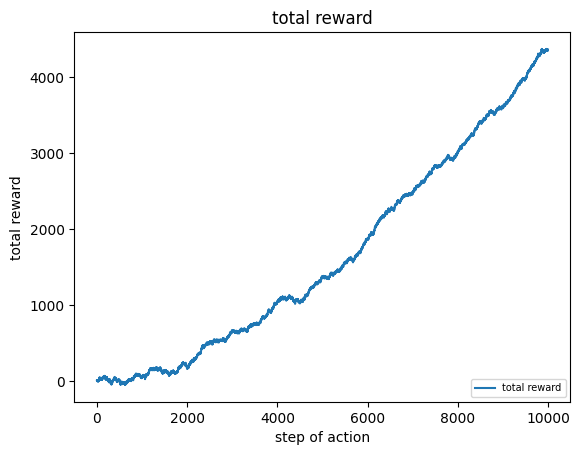

In [8]:
plt.plot(UCB500.his_total_reward, label="total reward")

plt.title("total reward")
plt.xlabel("step of action")
plt.ylabel("total reward")
leg = plt.legend(loc='lower right', fontsize=7, ncol=3)
plt.show()

In conclusion, that increasing the value of C results in a faster convergence towards the true reward because it increases exploration, leading to more frequent changes in actions. On the other hand, causes the total_reward graph to have a considerable amount of noise (characterized by frequent fluctuations).

## **conclusion**

In the **Greedy Epsilon algorithm**, it's noticeable that decreasing the value of Epsilon to near 0 leads to more exploitation than exploration. This results in selecting only 1-2 actions, preventing the action values from converging towards the true reward for all actions. Conversely, increasing Epsilon to near 1 leads to increased exploration and more frequent random actions, facilitating the convergence of action values toward the true reward. However, this also leads to significantly lower actual rewards due to the constant fluctuation in rewards caused by exploration.

Similar to the Greedy Epsilon algorithm, in the case of the **Upper Confidence Bound (UCB)**, using a small value of C yields similar results to decreasing Epsilon close to 0, resulting in more exploitation than exploration. This leads to only a few actions having action values converging towards the true reward. Conversely, increasing the value of C has similar effects to increasing Epsilon close to 1, leading to increased exploration and more frequent random actions. This facilitates the convergence of action values towards the true reward but results in significantly lower actual rewards due to the constant fluctuation caused by exploration, similar to the Greedy Epsilon algorithm.